<a href="https://colab.research.google.com/github/joaobroggine/Data-Science-And-Machine-Learning/blob/main/two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

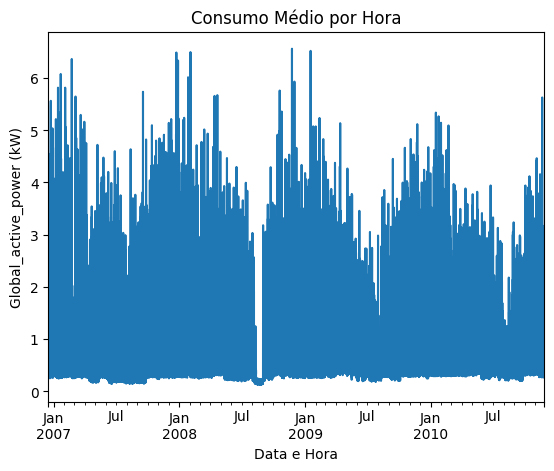

Datetime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
22    1.412681
9     1.331642
18    1.326433
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
17    1.056164
15    0.990806
16    0.948805
23    0.902142
6     0.791606
0     0.659562
1     0.539325
2     0.480618
5     0.453674
3     0.444850
4     0.443844
Name: Global_active_power, dtype: float64


In [15]:
# 21. Série temporal por hora

df['Datetime'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)
df = df.set_index('Datetime')
hora = df['Global_active_power'].resample('1h').mean()
hora.plot()
plt.title('Consumo Médio por Hora')
plt.xlabel('Data e Hora')
plt.ylabel('Global_active_power (kW)')
plt.show()
print(hora.groupby(hora.index.hour).mean().sort_values(ascending=False))

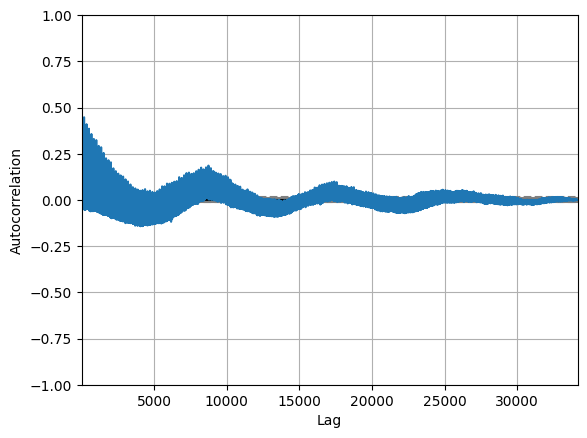

Autocorrelação - 1h: 0.7134555946916454
Autocorrelação - 24h: 0.4359072259119912
Autocorrelação - 48h: 0.40126926204501584


In [13]:
# 22. Autocorrelação do consumo

autocorrelation_plot(hora.dropna())
plt.show()
print("Autocorrelação - 1h:", hora.autocorr(lag=1))
print("Autocorrelação - 24h:", hora.autocorr(lag=24))
print("Autocorrelação - 48h:", hora.autocorr(lag=48))

In [17]:
# 23. Redução de dimensionalidade com PCA

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df_2007 = df[df['Date'].dt.year == 2007].copy()

for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']:
    df_2007[col] = pd.to_numeric(df_2007[col], errors='coerce')

X = df_2007[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].dropna()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Variância explicada:", pca.explained_variance_ratio_)

Variância explicada: [0.73774641 0.26191242]


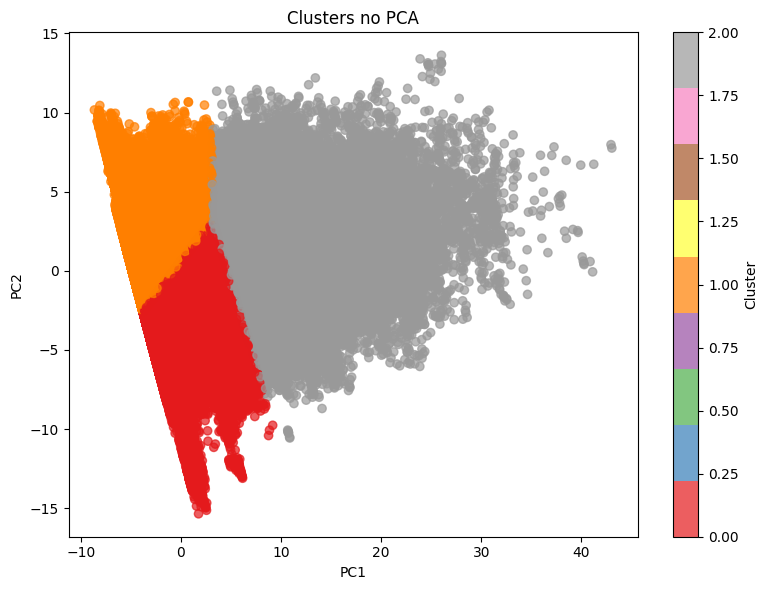

In [21]:
# 24. Visualização de clusters no espaço PCA

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters no PCA')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [22]:
# 25. Regressão polinomial vs linear (Global_active_power x Voltage)

X = df_2007[['Voltage']].dropna()
y = df_2007.loc[X.index, 'Global_active_power']
# Linear
lr = LinearRegression().fit(X, y)
y_pred_lr = lr.predict(X)
mse_lr = mean_squared_error(y, y_pred_lr)
# Polinomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr2 = LinearRegression().fit(X_poly, y)
y_pred_poly = lr2.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
print("RMSE Linear:", mse_lr**0.5, "RMSE Poly:", mse_poly**0.5)

RMSE Linear: 1.0892893963162558 RMSE Poly: 1.087148367874498
